## The Stock Market Data


We will begin by examining some numerical and graphical summaries of the Smarket data, which is part of the ISLR library. This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. We have also recorded Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date in question) and Direction (whether the market was Up or Down on this date).

In [2]:
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## 4.6.1 The Stock Market Data

In [3]:
Smarket = pd.read_table("Smarket.csv", sep = ',')
Smarket = Smarket = Smarket.iloc[:,1:]

In [4]:
print(Smarket.shape, "\n")
print(Smarket.describe())

(1250, 9) 

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  

The corr() function produces a matrix that contains all of the pairwise correlations among the predictors in a data set. The first command below gives an error message because the Direction variable is qualitative.

In [5]:
print(Smarket.corr())

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


In [6]:
variables = Smarket.columns.tolist()
print(Smarket.drop(variables[8], axis = 1).corr())

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


In [ ]:
As one would expect, the correlations between the lag variables and to- day’s returns are close to zero. In other words, there appears to be little correlation between today’s returns and previous days’ returns. The only substantial correlation is between Year and Volume. By plotting the data we see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.


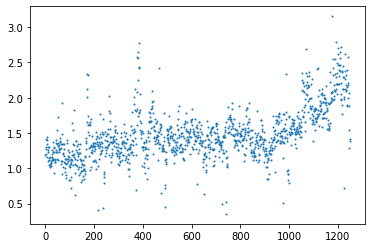

In [7]:
n = len(Smarket)
x = range(n)
plt.scatter(x, Smarket.Volume, s = 1)
plt.show()

## 4.6.2 Logistic Regression 
Next, we will fit a logistic regression model in order to predict Direction using Lag1 through Lag5 and Volume. 

In [8]:
data = Smarket
X = data.iloc[:,1:7].copy()
y = data.iloc[:,-1].copy()
n = len(y)
for i in range(n):
    if y[i] == 'Up':
        y[i] = 1
    elif y[i] == 'Down':
        y[i] = 0


In [9]:
y = y.astype(float) ## sometime need to convert to float
X = X.astype(float) ## so that statsmodel functions can handle

In [10]:
regr = sm.Logit(y, X, family = sm.families.Binomial()).fit()

Optimization terminated successfully.
         Current function value: 0.691143
         Iterations 4


In [10]:
print(regr.summary2())

                         Results: Logit
Model:              Logit            No. Iterations:   4.0000   
Dependent Variable: Direction        Pseudo R-squared: 0.002    
Date:               2018-03-28 16:26 AIC:              1739.8583
No. Observations:   1250             BIC:              1770.6436
Df Model:           5                Log-Likelihood:   -863.93  
Df Residuals:       1244             LL-Null:          -865.59  
Converged:          1.0000           Scale:            1.0000   
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
Lag1      -0.0721     0.0501   -1.4378   0.1505   -0.1703   0.0262
Lag2      -0.0434     0.0500   -0.8678   0.3855   -0.1415   0.0546
Lag3       0.0100     0.0499    0.1998   0.8416   -0.0878   0.1077
Lag4       0.0081     0.0499    0.1617   0.8715   -0.0897   0.1059
Lag5       0.0097     0.0495    0.19

The smallest p-value here is associated with Lag1. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.

In [19]:
print(regr.params)

Lag1     -0.072063
Lag2     -0.043420
Lag3      0.009969
Lag4      0.008073
Lag5      0.009685
Volume    0.054905
dtype: float64


In [20]:
pred = regr.predict()
print(pred[0:10])

[0.51502968 0.48805685 0.48458173 0.52021946 0.51767349 0.51086624
 0.49521645 0.51173353 0.52523007 0.49547214]


The predict() function can be used to predict the probability that the market will go up, given values of the predictors. The type="response" option tells R to output probabilities of the form P(Y = 1|X), as opposed to other information such as the logit. If no data set is supplied to the predict() function, then the probabilities are computed for the training data that was used to fit the logistic regression model. Here we have printed only the first ten probabilities. We know that these values correspond to the probability of the market going up, rather than down.


In [21]:
def contrast(variable):
    level = list(set(variable))
    n = len(level)
    df = pd.DataFrame(np.zeros([n,n]), index = level, columns = level)
    for i in range(n):
        for j in range(n):
            df.iloc[i,j] = 1 if i==j else 0
    
    return df

In [24]:
print(contrast(data.Direction))

      Down   Up
Down   1.0  0.0
Up     0.0  1.0


In [25]:
result = ['Up' if r > .5 else 'Down' for r in pred]
print(confusion_matrix(y_pred = result, y_true = data.Direction))  # sklearn version

[[100 502]
 [ 93 555]]


The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions. The mean() function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market 52.2 % of the time.
At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1, 250 observa- tions. In other words, 100 − 52.2 = 47.8 % is the training error rate. As we have seen previously, the training error rate is often overly optimistic, it tends to underestimate the test error rate. In order to better assess the ac- curacy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in practice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.

In [26]:
def conf_mat(y_true, y_pred): # function version
    df = contrast(y_true) # columns true, rows pred
    name = df.columns.tolist()
    n = len(y_pred)
    for j in range(len(name)):
        df.iloc[j,j] = 0
    for i in range(n):
        if y_true.iloc[i] == name[0]:
            if y_pred[i] == name[0]:
                df.iloc[0,0] += 1
            else :
                df.iloc[1,0] += 1
        else :
            if y_pred[i] == name[0]:
                df.iloc[0,1] += 1
            else :
                df.iloc[1,1] += 1
                
    return df

In [59]:
conf = conf_mat(data.Direction, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/len(y), '\n')
print(np.mean(pred))

       Down     Up
Down    0.0    0.0
Up    493.0  507.0 

0.5080160320641283 

0.7447787533067044


In [60]:
train = data[data.Year < 2005] # train-test split
test = data[[not a for a in data.Year < 2005]]

In [61]:
X = train.iloc[:,1:7].copy()
y = train.iloc[:,-1].copy()

X_test = test.iloc[:,1:7].copy()
y_test = test.iloc[:,-1].copy()

n = len(y)
for i in range(n):
    if y[i] == 'Up':
        y[i] = 1
    elif y[i] == 'Down':
        y[i] = 0

y = y.astype(float)
X = X.astype(float)
X_test = X_test.astype(float)

The object train is a vector of 1,250 elements, corresponding to the ob- servations in our data set. The elements of the vector that correspond to observations that occurred before 2005 are set to TRUE, whereas those that correspond to observations in 2005 are set to FALSE. The object train is a Boolean vector, since its elements are TRUE and FALSE. Boolean vectors can be used to obtain a subset of the rows or columns of a matrix. For instance, the command Smarket[train,] would pick out a submatrix of the stock market data set, corresponding only to the dates before 2005, since those are the ones for which the elements of train are TRUE. The ! symbol can be used to reverse all of the elements of a Boolean vector. That is, !train is a vector similar to train, except that the elements that are TRUE in train get swapped to FALSE in !train, and the elements that are FALSE in train get swapped to TRUE in !train. Therefore, Smarket[!train,] yields a submatrix of the stock market data containing only the observations for which train is FALSE—that is, the observations with dates in 2005. The output above indicates that there are 252 such observations.
We now fit a logistic regression model using only the subset of the obser- vations that correspond to dates before 2005, using the subset argument. We then obtain predicted probabilities of the stock market going up for each of the days in our test set—that is, for the days in 2005.

In [63]:
regr = sm.Logit(y, X, family=sm.families.Binomial()).fit()
print(regr.summary2())

Optimization terminated successfully.
         Current function value: 0.692101
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.001    
Dependent Variable: Direction        AIC:              1393.4337
Date:               2020-02-19 10:35 BIC:              1422.8682
No. Observations:   998              Log-Likelihood:   -690.72  
Df Model:           5                LL-Null:          -691.63  
Df Residuals:       992              LLR p-value:      0.87193  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
Lag1      -0.0557     0.0517   -1.0775   0.2812   -0.1571   0.0456
Lag2      -0.0440     0.0517   -0.8506   0.3950   -0.1453   0.0573
Lag

In [64]:
pred = regr.predict(X_test)
result = ['Up' if r > .5 else 'Down' for r in pred]
print(np.mean(pred)) ## out-of-sample

0.5085663310527532


In [65]:
conf = conf_mat(y_test, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/np.sum(conf.values)) ## out-of-sample

      Down     Up
Down  33.0   26.0
Up    78.0  115.0 

0.5873015873015873


Now the results appear to be a little better: 58.7% of the daily movements have been correctly predicted. It is worth noting that in this case, a much simpler strategy of predicting that the market will increase every day will also be correct 56% of the time! Hence, in terms of overall error rate, the logistic regression method is no better than the na ̈ıve approach. However, the confusion matrix shows that on days when logistic regression predicts an increase in the market, it has a 58% accuracy rate. This suggests a possible trading strategy of buying on days when the model predicts an in- creasing market, and avoiding trades on days when a decrease is predicted. Of course one would need to investigate more carefully whether this small improvement was real or just due to random chance.

In [66]:
X = train.iloc[:,1:3].copy()
y = train.iloc[:,-1].copy()

X_test = test.iloc[:,1:3].copy()
y_test = test.iloc[:,-1].copy()

n = len(y)
for i in range(n):
    if y[i] == 'Up':
        y[i] = 1
    elif y[i] == 'Down':
        y[i] = 0

y = y.astype(float)
X = X.astype(float)
X_test = X_test.astype(float)

regr = sm.Logit(y, X, family=sm.families.Binomial()).fit()
print(regr.summary2())

Optimization terminated successfully.
         Current function value: 0.692215
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.001    
Dependent Variable: Direction        AIC:              1385.6605
Date:               2020-02-19 10:37 BIC:              1395.4720
No. Observations:   998              Log-Likelihood:   -690.83  
Df Model:           1                LL-Null:          -691.63  
Df Residuals:       996              LLR p-value:      0.20523  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
Lag1      -0.0556     0.0517   -1.0751   0.2823   -0.1569   0.0457
Lag2      -0.0445     0.0517   -0.8606   0.3895   -0.1457   0.0568



In [67]:
pred = regr.predict(X_test)
result = ['Up' if r > .5 else 'Down' for r in pred]
print(np.mean(pred)) ## out-of-sample

0.49960585327087725


In [68]:
conf = conf_mat(y_test, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/np.sum(conf.values)) ## out-of-sample

      Down    Up
Down  64.0  67.0
Up    47.0  74.0 

0.5476190476190477


In [69]:
X_new = np.array([[1.2,1.5],[1.1,-0.8]])
regr.predict(X_new)

array([0.4667031 , 0.49360611])

## 4.6.3 Linear Discriminant Analysis

Now we will perform LDA on the Smarket data. In R, we fit an LDA model using the LinearDiscriminantAnalysis() function, which is part of the MASS library. Notice that the syntax for the LinearDiscriminantAnalysis() function is identical to that of logistic regression.

In [70]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print(clf.priors_, '\n') # hint: tap 'tab' after dot '.' to see availible attributes of an obj
print(clf.means_, '\n')
print(clf.coef_, '\n')
print(clf.intercept_)

[0.49198397 0.50801603] 

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]] 

[[-0.05544078 -0.0443452 ]] 

[0.03221375]


The LDA output indicates that $\hat{π}_1$ = 0.492 and $\hat{π}_2 = 0.508$; in other words, 49.2% of the training observations correspond to days during which the market went down. It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of μk. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines. The coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of X = x in (4.19). If −0.642 × Lag1 − 0.514 × Lag2 is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline. The plot() function produces plots of the linear discriminants, obtained by computing −0.642 × Lag1 − 0.514 × Lag2 for each of the training observations.

The predict() function returns a list with three elements. The first ele- ment, class, contains LDA’s predictions about the movement of the market. The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class, computed from (4.10). Finally, x contains the linear discriminants, described earlier.


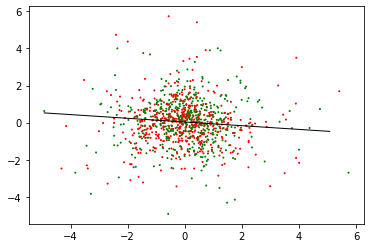

In [38]:
n = len(X)
x1 = np.arange(min(X.Lag1), max(X.Lag1))
x2 = np.arange(min(X.Lag2), max(X.Lag2))
yy = clf.intercept_ + x1 * clf.coef_[0,0] + x2 * clf.coef_[0,1]
color = ['red' if a == 1 else 'green' for a in y]

plt.scatter(X['Lag1'], X['Lag2'], s = 1, color = color)
plt.plot(x1, yy, linewidth = 1, color = 'black')
plt.show()

In [39]:
pred = clf.predict(X_test)
print(clf.classes_, '\n')

[0. 1.] 



In [40]:
result = ['Up' if r > .5 else 'Down' for r in pred]
conf = conf_mat(y_test, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/len(y_test))

      Down     Up
Down  35.0   35.0
Up    76.0  106.0 

0.5595238095238095


In [41]:
post = clf.predict_proba(X_test)
#print(post, '\n') # posteriors
print(sum(post[:,0] >= .5))
print(sum(post[:,0] < .5))

70
182


In [42]:
print(post[0:20,0], '\n')
print(pred[0:20], '\n')
print(sum(post[:,0] > .9))

[0.49017925 0.4792185  0.46681848 0.47400107 0.49278766 0.49385615
 0.49510156 0.4872861  0.49070135 0.48440262 0.49069628 0.51199885
 0.48951523 0.47067612 0.47445929 0.47995834 0.49357753 0.50308938
 0.49788061 0.48863309] 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.] 

0


## 4.6.4 Quadratic Discriminant Analysis

We will now fit a QDA model to the Smarket data. 

In [43]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
print(clf.priors_, '\n') # hint: tap 'tab' after dot '.' to see availible attributes of an obj
print(clf.means_, '\n')

[0.49198397 0.50801603] 

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]] 



In [44]:
pred = clf.predict(X_test)
result = ['Up' if r > .5 else 'Down' for r in pred]
conf = conf_mat(y_test, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/len(y_test))

      Down     Up
Down  30.0   20.0
Up    81.0  121.0 

0.5992063492063492


Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## K-Nearest Neighbors

We will now perform KNN using the KNeighborsClassifier() function. 
This function works rather differently from the other model fitting functions that we have encountered thus far. 

In [45]:
random.seed(100)

In [73]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, y)
pred = clf.predict(X_test)
result = ['Up' if r > .5 else 'Down' for r in pred]
conf = conf_mat(y_test, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/len(y_test))

      Down    Up
Down  43.0  58.0
Up    68.0  83.0 

0.5


In [74]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X, y)
pred = clf.predict(X_test)
result = ['Up' if r > .5 else 'Down' for r in pred]
conf = conf_mat(y_test, result)
print(conf, '\n')
print((conf.iloc[0,0]+conf.iloc[1,1])/len(y_test))

      Down    Up
Down  48.0  55.0
Up    63.0  86.0 

0.5317460317460317


## 4.6.6 An Application to Caravan Insuarance Data

In [48]:
Caravan = pd.read_table("Caravan.csv", sep = ',')
print(Caravan.shape, '\n')
print(Caravan.Purchase.describe(), '\n')
print(sum(Caravan.Purchase == 'Yes'), sum(Caravan.Purchase == 'No'), '\n')
print(sum(Caravan.Purchase == 'Yes')/len(Caravan))

(5822, 87) 

count     5822
unique       2
top         No
freq      5474
Name: Purchase, dtype: object 

348 5474 

0.05977327378907592


In [49]:
i = 2
X = Caravan.drop('Purchase', axis = 1)
X = preprocessing.scale(X, axis = 0)
print(np.mean(Caravan.iloc[:,i]))
print(np.mean(X[:,i]), '\n')
print(np.var(Caravan.iloc[:,i]))
print(np.var(X[:,i]))

1.1106149089659911
-1.6140377328112892e-16 

0.1646794913476145
1.0


In [50]:
test = list(range(1000))
train = list(range(1000, len(Caravan)))
X_train = X[train]
X_test = X[test]
y_train = Caravan.Purchase[train]
y_test = Caravan.Purchase[test]

In [51]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(np.mean(y_test != pred))
print(np.mean(y_test != 'No'))

0.107
0.059


In [52]:
conf = conf_mat(y_test, pred)
print(conf, '\n')
print(conf.iloc[1,1]/(conf.iloc[1,0]+conf.iloc[1,1])) # don't know sometime it changes. [Yes,Yes]/([Yes,Yes]+[No,Yes])

        No   Yes
No   882.0  48.0
Yes   59.0  11.0 

0.15714285714285714


In [53]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
conf = conf_mat(y_test, pred)
print(conf, '\n')
print(conf.iloc[1,1]/(conf.iloc[1,0]+conf.iloc[1,1]))

        No   Yes
No   921.0  53.0
Yes   20.0   6.0 

0.23076923076923078


In [54]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
conf = conf_mat(y_test, pred)
print(conf, '\n')
print(conf.iloc[1,1]/(conf.iloc[1,0]+conf.iloc[1,1]))

        No   Yes
No   934.0  55.0
Yes    7.0   4.0 

0.36363636363636365


In [55]:
y_train_num = [1 if a == 'Yes' else 0 for a in y_train]

In [56]:
regr = sm.Logit(y_train_num, X_train, family=sm.families.Binomial()).fit()
pred = regr.predict(X_test)
result = ['Yes' if r > .5 else 'No' for r in pred]
conf = conf_mat(y_test, result)
print(conf, '\n')
print(conf.iloc[1,1]/(conf.iloc[1,0]+conf.iloc[1,1]))

Optimization terminated successfully.
         Current function value: 0.634868
         Iterations 6
        No   Yes
No     0.0   0.0
Yes  941.0  59.0 

0.059


In [57]:
thr = 0.9
result = ['Yes' if r > thr else 'No' for r in pred]
conf = conf_mat(y_test, result)
print(conf, '\n')
print(conf.iloc[1,1]/(conf.iloc[1,0]+conf.iloc[1,1]))

        No   Yes
No   931.0  54.0
Yes   10.0   5.0 

0.3333333333333333
